<a href="https://colab.research.google.com/github/kashishdatta/Deep-Learning-A-Z/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SELF ORGANISING MAPS

Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the Dataset

In [5]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

Training the SOM

In [9]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

Visualizing the Results

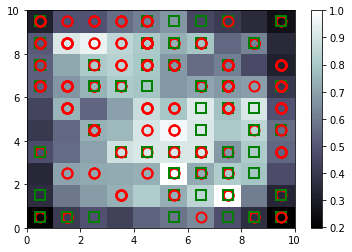

In [12]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o', 's']
colors=['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

Finding the Frauds

In [13]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,1)], mappings[(5,2)]), axis=0)
frauds = sc.inverse_transform(frauds)